# Week 1: Web-Crawler

In [ ]:
# 한글 폰트

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
!pip install bs4 requests

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
plt.rc('font', family='NanumBarunGothic')

In [ ]:
import urllib.request
import datetime
import time
import json
from bs4 import BeautifulSoup
import requests
import re
from tqdm import tqdm

## BeautifulSoup

In [ ]:
from bs4 import BeautifulSoup

# Example HTML content
html = """
<html>
    <head>
        <title>The Dormouse's story</title>
    </head>
    <body>
        <p class="title"><b>The Dormouse's story</b></p>
        <p class="story">Once upon a time there were three little sisters; and their names were
        <a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
        <a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
        <a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
        and they lived at the bottom of a well.</p>
        <p class="story">...</p>
</body>
</html>
"""

# Creating a BeautifulSoup object
soup = BeautifulSoup(html, 'html.parser')

In [ ]:
soup


<html>
<head>
<title>The Dormouse's story</title>
</head>
<body>
<p class="title"><b>The Dormouse's story</b></p>
<p class="story">Once upon a time there were three little sisters; and their names were
        <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
        <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
        <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
        and they lived at the bottom of a well.</p>
<p class="story">...</p>
</body>
</html>

In [ ]:
soup.select('head')

[<head>
 <title>The Dormouse's story</title>
 </head>]

In [ ]:
print(soup.select('p'))
print(soup.select('p.title'))

[<p class="title"><b>The Dormouse's story</b></p>, <p class="story">Once upon a time there were three little sisters; and their names were
        <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
        <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
        <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
        and they lived at the bottom of a well.</p>, <p class="story">...</p>]
[<p class="title"><b>The Dormouse's story</b></p>]


In [ ]:
print(soup.select('p.title > b'))

[<b>The Dormouse's story</b>]


In [ ]:
print(soup.select('p.story > a.sister'))

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>, <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>, <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]


In [ ]:
print(soup.select('p.story > a.sister#link2'))

[<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>]


In [ ]:
soup.select('p.story > a.sister#link2')[0].text

'Lacie'

In [ ]:
soup.select('p.story > a.sister#link2')[0]['href']

'http://example.com/lacie'

## Request

In [ ]:
url = 'https://www.segye.com/newsView/20240421508494?OutUrl=naver'

In [ ]:
headers = {"User-Agent": 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.6312.124 Safari/537.36'} # 서버에 요청이
html = requests.get(url,headers = headers)

In [ ]:
html

<Response [200]>

In [ ]:
soup = BeautifulSoup(html.text, "html.parser")
soup

<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<!-- Global site tag (gtag.js) - Google Analytics 20220531-->
<script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-34857780-1"></script>
<script>
  window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}

  gtag('js', new Date());

  gtag('config', 'UA-34857780-1');
  gtag('config', 'G-95BQXKZ5VX');
  gtag('config', 'G-V3FF3RRGZH'); // 전체
</script>
<script type="text/javascript">
    var addresshttps = unescape(location.href);
	  
      if (document.location.protocol == 'http:') {
        if (addresshttps.indexOf('9999') > -1 || addresshttps.indexOf('sales') > -1 || addresshttps.indexOf('ucc') > -1 || addresshttps.indexOf('w1') > -1 || addresshttps.indexOf('w2') > -1 || addresshttps.indexOf('w3') > -1 ) {
        }else{
          document.location.href = document.location.href.replace('http:', 'https:');
        }
      }

     </script>
<titl

## Selenium

In [ ]:
! pip install selenium

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

options = Options()
options.add_argument('--headless') # 구글 코랩에서는 headless 옵션이 들어가야함
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome(options=options)

url = 'https://www.naver.com'
driver.get(url)

In [ ]:
search_box = driver.find_elements(By.XPATH, '/html/body/div[2]/div[1]/div/div[3]/div[2]/div/form/fieldset/div/input')[0]
search_box.clear()
search_box.send_keys('총선'+Keys.ENTER)

In [ ]:
body = driver.find_elements(By.XPATH,'/html/body')[0]
body.send_keys(Keys.END)

In [ ]:
num = driver.find_elements(By.XPATH,'/html/body/div[3]/div[2]/div/div[1]/div[18]/div/div/a[2]')[0]
num.click()

<html data-platform="linux x86_64" data-useragent="mozilla/5.0 (x11; linux x86_64) applewebkit/537.36 (khtml, like gecko) headlesschrome/124.0.6367.60 safari/537.36" lang="ko"><head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="총선 : 네이버 통합웹검색" property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'총선'의 네이버 통합웹검색 결과입니다." property="og:description"/> <meta content="'총선'의 네이버 통합웹검색 결과입니다." lang="ko" name="description"/> <title>총선 : 네이버 통합웹검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"/><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_240314.css" rel="stylesheet" type="
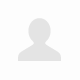
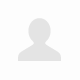

In [ ]:
html = driver.page_source
soup = BeautifulSoup(html,'html.parser')
soup

## Practice

### Naver News Main

In [ ]:
url = 'https://news.naver.com/'
headers = {"User-Agent": 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.6312.124 Safari/537.36'}
html = requests.get(url,headers = headers)
html

<Response [200]>

In [ ]:
soup = BeautifulSoup(html.text, "html.parser")
soup


<!DOCTYPE html>

<html lang="ko">
<head>
<title id="browserTitleArea">네이버 뉴스</title>
<script>
	function isMobileDevice() {
		return /^.*(iPhone|iPod|iPad|Android).*/.test(navigator.userAgent);
	}
</script>
<script>
	(function () {
		try {
			if (isMobileDevice() && isAbleApplyPrefersColorScheme()) {
				
				document.querySelector("html").classList.add("DARK_THEME");
			}
		} catch(e) {}

		function isAbleApplyPrefersColorScheme() {
			
			if (window.matchMedia("(prefers-color-scheme)").matches === false) {
				return false;
			}

			var userAgent = navigator.userAgent;

			if (userAgent.indexOf("NAVER") > -1) {
				
				if (/.*NAVER\([a-zA-Z]*;\s[a-zA-Z]*;\s([0-9]*);/.test(userAgent)) {
					return Number(RegExp.$1) >= 1000;
				}
			} else {
				
				return document.cookie.indexOf("NSCS=1") > -1;
			}

			return false;
		}
	})();
</script>
<script>
		var g_ssc = 'news.v3_media' || null;
		</script>
<meta charset="utf-8"/>
<meta content="width=device-width,initial-scale=1.0,maximum-s

In [ ]:
len(set([item.text for item in soup.select('li.cjs_age_item > a > div.cjs_age_name')]))

82

In [ ]:
[item.text for item in soup.select('li.cjs_age_item > a > div.cjs_age_name')]

['매경이코노미',
 '시사저널',
 '신동아',
 '이코노미스트',
 '월간산',
 '주간동아',
 '주간경향',
 '주간조선',
 '한경비즈니스',
 '한겨레21',
 '시사IN',
 '더스쿠프',
 '강원도민일보',
 'CJB청주방송',
 '대전일보',
 '부산일보',
 '국제신문',
 '경기일보',
 '대구MBC',
 'kbc광주방송',
 '매일신문',
 '전주MBC',
 'JIBS',
 '강원일보',
 '조선비즈',
 '비즈워치',
 '한국경제',
 '파이낸셜뉴스',
 '조세일보',
 '머니투데이',
 '헤럴드경제',
 '아시아경제',
 '서울경제',
 '매일경제',
 '이데일리',
 '코리아헤럴드',
 '여성신문',
 '코메디닷컴',
 '뉴스타파',
 '일다',
 '헬스조선',
 '기자협회보',
 '농민신문',
 '코리아중앙데일리',
 '동아사이언스',
 '중앙일보',
 '한국일보',
 '세계일보',
 '서울신문',
 '국민일보',
 '동아일보',
 '문화일보',
 '조선일보',
 '경향신문',
 '한겨레',
 '미디어오늘',
 '노컷뉴스',
 '지디넷코리아',
 '아이뉴스24',
 '프레시안',
 '디지털데일리',
 '머니S',
 '오마이뉴스',
 '전자신문',
 '데일리안',
 '더팩트',
 '디지털타임스',
 '블로터',
 'YTN',
 'JTBC',
 '연합뉴스',
 'SBS',
 'TV조선',
 '뉴시스',
 'MBC',
 '연합뉴스TV',
 'KBS',
 '뉴스1',
 'MBN',
 '채널A',
 '한국경제TV',
 'SBS Biz']

### Naver News

In [ ]:
# https://developers.naver.com/main/

# Set your API keys
client_id = 'zYa9O9tIE1u0ksLVL0g9'
client_secret = 'x4UvqCrzbd'

In [ ]:
keword = input("검색할 키워드:")
encText = urllib.parse.quote(keword)

검색할 키워드:총선


In [ ]:
import requests

# Set your API keys
client_id = 'zYa9O9tIE1u0ksLVL0g9'
client_secret = 'x4UvqCrzbd'

# Set the API endpoint and headers for authentication
url = "https://openapi.naver.com/v1/search/blog?query=example"
headers = {
    'X-Naver-Client-Id': client_id,
    'X-Naver-Client-Secret': client_secret
}

# Make the request
response = requests.get(url, headers=headers)

# Check the response
if response.status_code == 200:
    # Process the response if successful
    data = response.json()
    print(data)
else:
    print("Failed to retrieve data:", response.status_code)


{'lastBuildDate': 'Tue, 23 Apr 2024 16:58:32 +0900', 'total': 671661, 'start': 1, 'display': 10, 'items': [{'title': '<b>Example</b>  예시', 'link': 'https://blog.naver.com/huneyk/223354227863', 'description': '[그림 1] <b>Example</b> 이 예시에는 placeholder가 같이 쓰였다. 그러면서 결과를 보여줄 형식을 예시로... [그림 2] <b>Example</b> 제시 결과 여지없이 예시한 모양대로 정리해준다. 응답 결과를 원하는 모양대로 끄집어내는... ', 'bloggername': 'AI Story - 인공지능 이야기', 'bloggerlink': 'blog.naver.com/huneyk', 'postdate': '20240328'}, {'title': '입트영  vibrant, ultimate, engage in, lead by <b>example</b>', 'link': 'https://blog.naver.com/500yeon/223420310752', 'description': 'by <b>example</b> accommodation 숙소 providing a place to stay or live, especially temporarily 여행시... It can also imply the best or most extreme <b>example</b> of a particular quality 1. get the most out of 명사... ', 'bloggername': '오우영 : 오늘도 우리는 영어공부합니다.', 'bloggerlink': 'blog.naver.com/500yeon', 'postdate': '20240419'}, {'title': '점점 길어지는 영어__Set an <b>example</b> (본보기를 보이다)', 'link': 'https:/

In [ ]:
naver_urls = []
titles = []
pub_dates = []
descriptions = []

In [ ]:
# 검색을 끝낼 페이지 입력
end = input("\n크롤링을 끝낼 페이지 위치를 입력해주세요. (기본값:1, ):")
if end == "":
    end = 1
else:
    end = int(end)
print("\n 1 ~ ", end, "페이지 까지 크롤링을 진행 합니다")

# 한번에 가져올 페이지 입력
display = input("\n한번에 가져올 페이지 개수를 입력해주세요.(기본값:10,):")
if display == "":
    display = 10
else:
    display = int(display)
print("\n한번에 가져올 페이지 : ", display, "페이지")

for start in range(end):
    url = "https://openapi.naver.com/v1/search/news?query=" + encText + "&start=" + str(start+1) + "&display=" + str(display+1) # JSON 결과
    headers = {
    'X-Naver-Client-Id': client_id,
    'X-Naver-Client-Secret': client_secret
    }

    # Make the request
    response = requests.get(url, headers=headers)
    rescode = response.status_code
    if(rescode==200):
        data = response.json()['items']
        for row in data:
            if('news.naver' in row['link']):
                titles.append(row['title'])
                naver_urls.append(row['link'])
                pub_dates.append(row['pubDate'])
                descriptions.append(row['description'])
        time.sleep(3)
    else:
        print("Error Code:" + rescode)


크롤링을 끝낼 페이지 위치를 입력해주세요. (기본값:1, ):5

 1 ~  5 페이지 까지 크롤링을 진행 합니다

한번에 가져올 페이지 개수를 입력해주세요.(기본값:10,):10

한번에 가져올 페이지 :  10 페이지


In [ ]:
response.json()

{'lastBuildDate': 'Tue, 23 Apr 2024 17:05:51 +0900',
 'total': 2423568,
 'start': 5,
 'display': 11,
 'items': [{'title': '경실련 “거대 양당, 위성정당 보조금 28억원씩 더 받아&quot;',
   'originallink': 'https://www.kyeonggi.com/article/20240423580251',
   'link': 'https://n.news.naver.com/mnews/article/666/0000039956?sid=100',
   'description': '22대 <b>총선</b>에서 위성정당을 통해 총 56억원이 넘는 선거 보조금을 추가로 확보했다는 주장이 제기됐다. 경제정의실천시민연합(경실련)은 23일 오전 서울 종로구 경실련 강당에서 기자회견을 열고 “양당이 이번 <b>총선</b>에서... ',
   'pubDate': 'Tue, 23 Apr 2024 17:04:00 +0900'},
  {'title': '전세가 비율 높은 미분양 제로 지역 노려라',
   'originallink': 'http://www.paxetv.com/news/articleView.html?idxno=201627',
   'link': 'http://www.paxetv.com/news/articleView.html?idxno=201627',
   'description': '전문가들은 &quot;건설사들이 <b>총선</b> 등을 피하기 위해 그동안 미뤄뒀던 아파트 분양에 대거 나서고 있다&quot;며... <b>총선</b> 등 여파로 지난달까지 소강상태를 보였던 새 아파트 분양시장이 이달 말 이후 본격 재개됩니다. 현재와... ',
   'pubDate': 'Tue, 23 Apr 2024 17:03:00 +0900'},
  {'title': '영수회담 테이블 오를 추경, 고민 커진 재정당국',
   'originallink': 'https://www.khan

In [ ]:
len(naver_urls)

13

In [ ]:
url = naver_urls[1]
html = requests.get(url, headers=headers)
html

<Response [200]>

In [ ]:
html.text

'<!doctype html>\n<html lang="ko" data-useragent="python-requests/2.31.0">\n\t<head>\n\t\t<meta charset="utf-8">\n\t\t<meta http-equiv="X-UA-Compatible" content="IE=edge">\n\t\t<meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" />\n\t\t<meta property="og:title" content="영수회담 테이블 오를 추경, 고민 커진 재정당국">\n\t\t<meta property="og:type" content="article">\n\t\t<meta property="og:url" content="https://n.news.naver.com/mnews/article/032/0003292305?sid&#x3D;101">\n\t\t<meta property="og:image" content="https://imgnews.pstatic.net/image/032/2024/04/23/0003292305_001_20240423170301084.png?type&#x3D;w800">\n\t\t<meta property="og:description" content="더불어민주당이 15조원 규모의 추가경정예산(추경)안 편성 압박 수위를 높이면서 재정당국의 고민이 커지고 있다. 올해도 세수 결손 우려가 커지고 있어 건전재정을 앞세운 정부로선 추경 요구를 수용하기 쉽지 않다. 다만 ">\n\t\t<meta property="og:article:author" content="경향신문 | 네이버">\n\t\t<meta name="twitter:card" content="summary_large_image">\n\t\t<meta name="twitter:title" c

In [ ]:
url

'https://n.news.naver.com/mnews/article/032/0003292305?sid=101'

In [ ]:
soup = BeautifulSoup(html.text, "html.parser")

In [ ]:
soup.find_all('h2',{'id':'title_area'}) # list

[<h2 class="media_end_head_headline" id="title_area"><span>영수회담 테이블 오를 추경, 고민 커진 재정당국</span></h2>]

In [ ]:
soup.select('h2.media_end_head_headline#title_area') # list

[<h2 class="media_end_head_headline" id="title_area"><span>영수회담 테이블 오를 추경, 고민 커진 재정당국</span></h2>]

In [ ]:
soup.select('h2 > span') # list

[<span>영수회담 테이블 오를 추경, 고민 커진 재정당국</span>]

In [ ]:
soup.find('h2',{'id':'title_area'}) # value

<h2 class="media_end_head_headline" id="title_area"><span>영수회담 테이블 오를 추경, 고민 커진 재정당국</span></h2>

In [ ]:
title = soup.select('h2.media_end_head_headline#title_area')[0].text

In [ ]:
title

'영수회담 테이블 오를 추경, 고민 커진 재정당국'

In [ ]:
soup.select('article')[0].text

'\n\n\n\n\n연합뉴스더불어민주당이 15조원 규모의 추가경정예산(추경)안 편성 압박 수위를 높이면서 재정당국의 고민이 커지고 있다. 올해도 세수 결손 우려가 커지고 있어 건전재정을 앞세운 정부로선 추경 요구를 수용하기 쉽지 않다. 다만 윤석열 대통령과 이재명 민주당 대표의 첫 회담에서 의제로 다뤄질 가능성이 높고, 총선 후 여야간 협치의 가늠자가 될 수 있다는 점에서 귀추가 주목된다.23일 정부와 국회에 따르면 민주당이 요구하는 추경 규모는 15조원이다. 전국민 민생회복지원금 지급에 13조원, 저금리 대환대출 예산 증액 5000억원, 소상공인 전통시장 자금 증액 4000억원, 소상공인 에너지 지원 비용 3000억원 등이다.민주당은 추경 편성을 통해 총선 공약으로 내걸었던 1인당 민생지원금 25만원 지급을 관철시킨다는 입장이다. 홍익표 민주당 원내대표는 앞서 “적극적인 재정확대 정책을 통해 우리 경제가 살아난다면 정부가 강조하는 재정건전성도 좋아질 수 있다”며 추경 편성을 압박했다.추경 편성에 대한 공식적인 입장은 정리되지 않았지만 정부·여당에서는 일단 부정적 기류가 크다. 당장 지난 정부를 방만재정으로 비판하면서 긴축재정 기조로 전환한 정부가 현금성 지원을 위한 추경 편성에 동참하기란 쉽지 않을 것이라는 전망이 나온다.재정여력 부족이라는 현실적 난관도 무시할 수 없다. 지난해 56조원에 달하는 세수결손으로 총수입에서 총지출을 뺀 재정수지 적자는 36조8000억원에 달했다. 사회보장성기금 수입을 뺀 관리재정수지는 87조원 적자를 기록, 국내총생산(GDP) 대비 적자비율(3.9%)이 IMF 외환위기와 코로나19 사태 이후 가장 높았다.세수 여건 역시 녹록치않다. 정부는 지난해 경기침체를 감안해 올해 법인세 수입을 전년 대비 26%나 낮춰잡았지만 상황이 더 나빠질 것으로 예상된다. 국제유가 상승으로 유류세 인하 조치도 연장됐다. 세수결손이 올해도 이어질 수 있다는 얘기로, 야당이 요구하는 추경 편성을 위해서는 사실상 적자국채를 발행해야 한다. 문제는 국가채무가

In [ ]:
description = soup.select('article')[0].text

In [ ]:
description

'\n\n\n\n\n연합뉴스더불어민주당이 15조원 규모의 추가경정예산(추경)안 편성 압박 수위를 높이면서 재정당국의 고민이 커지고 있다. 올해도 세수 결손 우려가 커지고 있어 건전재정을 앞세운 정부로선 추경 요구를 수용하기 쉽지 않다. 다만 윤석열 대통령과 이재명 민주당 대표의 첫 회담에서 의제로 다뤄질 가능성이 높고, 총선 후 여야간 협치의 가늠자가 될 수 있다는 점에서 귀추가 주목된다.23일 정부와 국회에 따르면 민주당이 요구하는 추경 규모는 15조원이다. 전국민 민생회복지원금 지급에 13조원, 저금리 대환대출 예산 증액 5000억원, 소상공인 전통시장 자금 증액 4000억원, 소상공인 에너지 지원 비용 3000억원 등이다.민주당은 추경 편성을 통해 총선 공약으로 내걸었던 1인당 민생지원금 25만원 지급을 관철시킨다는 입장이다. 홍익표 민주당 원내대표는 앞서 “적극적인 재정확대 정책을 통해 우리 경제가 살아난다면 정부가 강조하는 재정건전성도 좋아질 수 있다”며 추경 편성을 압박했다.추경 편성에 대한 공식적인 입장은 정리되지 않았지만 정부·여당에서는 일단 부정적 기류가 크다. 당장 지난 정부를 방만재정으로 비판하면서 긴축재정 기조로 전환한 정부가 현금성 지원을 위한 추경 편성에 동참하기란 쉽지 않을 것이라는 전망이 나온다.재정여력 부족이라는 현실적 난관도 무시할 수 없다. 지난해 56조원에 달하는 세수결손으로 총수입에서 총지출을 뺀 재정수지 적자는 36조8000억원에 달했다. 사회보장성기금 수입을 뺀 관리재정수지는 87조원 적자를 기록, 국내총생산(GDP) 대비 적자비율(3.9%)이 IMF 외환위기와 코로나19 사태 이후 가장 높았다.세수 여건 역시 녹록치않다. 정부는 지난해 경기침체를 감안해 올해 법인세 수입을 전년 대비 26%나 낮춰잡았지만 상황이 더 나빠질 것으로 예상된다. 국제유가 상승으로 유류세 인하 조치도 연장됐다. 세수결손이 올해도 이어질 수 있다는 얘기로, 야당이 요구하는 추경 편성을 위해서는 사실상 적자국채를 발행해야 한다. 문제는 국가채무가

In [ ]:
soup.select('div.media_end_head_info_datestamp > div > span')

[<span class="media_end_head_info_datestamp_time _ARTICLE_DATE_TIME" data-date-time="2024-04-23 17:03:01" data-date-time-age-in-minutes="2">2024.04.23. 오후 5:03</span>]

In [ ]:
soup.select('div.media_end_head_info_datestamp > div > span')[0]['data-date-time']

'2024-04-23 17:03:01'

In [ ]:
date = soup.select('div.media_end_head_info_datestamp > div > span')[0].text

In [ ]:
soup.select('img.media_end_head_top_logo_img.light_type._LAZY_LOADING._LAZY_LOADING_INIT_HIDE')[0]['alt']

'경향신문'

In [ ]:
publisher = soup.select('img.media_end_head_top_logo_img.light_type._LAZY_LOADING._LAZY_LOADING_INIT_HIDE')[0]['alt']

In [ ]:
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) Chrome/98.0.4758.102"}

temp_result_list = []
for url in tqdm(naver_urls):
  try:
    html = requests.get(url, headers=headers)
    soup = BeautifulSoup(html.text, "html.parser")

    title = soup.select('h2.media_end_head_headline#title_area')[0].text
    description = soup.select('article')[0].text
    date = soup.select('div.media_end_head_info_datestamp > div > span')[0].text
    publisher = soup.select('img.media_end_head_top_logo_img.light_type._LAZY_LOADING._LAZY_LOADING_INIT_HIDE')[0]['alt']

    temp_list = []
    temp_list.append(title)
    temp_list.append(description)
    temp_list.append(date)
    temp_list.append(publisher)
    temp_result_list.append(temp_list)
  except Exception as e:
    print(url)
    print(f"An error occurred: {e.__class__.__name__}")
    print(f"Error message: {str(e)}")

100%|██████████| 13/13 [00:06<00:00,  2.05it/s]


In [ ]:
import pandas as pd

df = pd.DataFrame(temp_result_list,columns = ['title','content','date','publisher'])
df.head()

,title,content,date,publisher
0,"경실련 “거대 양당, 위성정당 보조금 28억원씩 더 받아""","\n‘위성정당 위헌’ 헌재 각하에 “유권자 무시” \n\n\n\n 경실련, 위...",2024.04.23. 오후 5:04,경기일보
1,"영수회담 테이블 오를 추경, 고민 커진 재정당국",\n\n\n\n\n연합뉴스더불어민주당이 15조원 규모의 추가경정예산(추경)안 편성 ...,2024.04.23. 오후 5:03,경향신문
2,"경실련 “거대 양당, 위성정당 보조금 28억원씩 더 받아""","\n‘위성정당 위헌’ 헌재 각하에 “유권자 무시” \n\n\n\n 경실련, 위...",2024.04.23. 오후 5:04,경기일보
3,"영수회담 테이블 오를 추경, 고민 커진 재정당국",\n\n\n\n\n연합뉴스더불어민주당이 15조원 규모의 추가경정예산(추경)안 편성 ...,2024.04.23. 오후 5:03,경향신문
4,"경실련 “거대 양당, 위성정당 보조금 28억원씩 더 받아""","\n‘위성정당 위헌’ 헌재 각하에 “유권자 무시” \n\n\n\n 경실련, 위...",2024.04.23. 오후 5:04,경기일보


In [ ]:
df.to_csv('/content/drive/MyDrive/Text Mining/Naver_News.csv')
df.to_csv('/content/drive/MyDrive/Text Mining/Naver_News.csv',encoding= 'utf-8 sig')

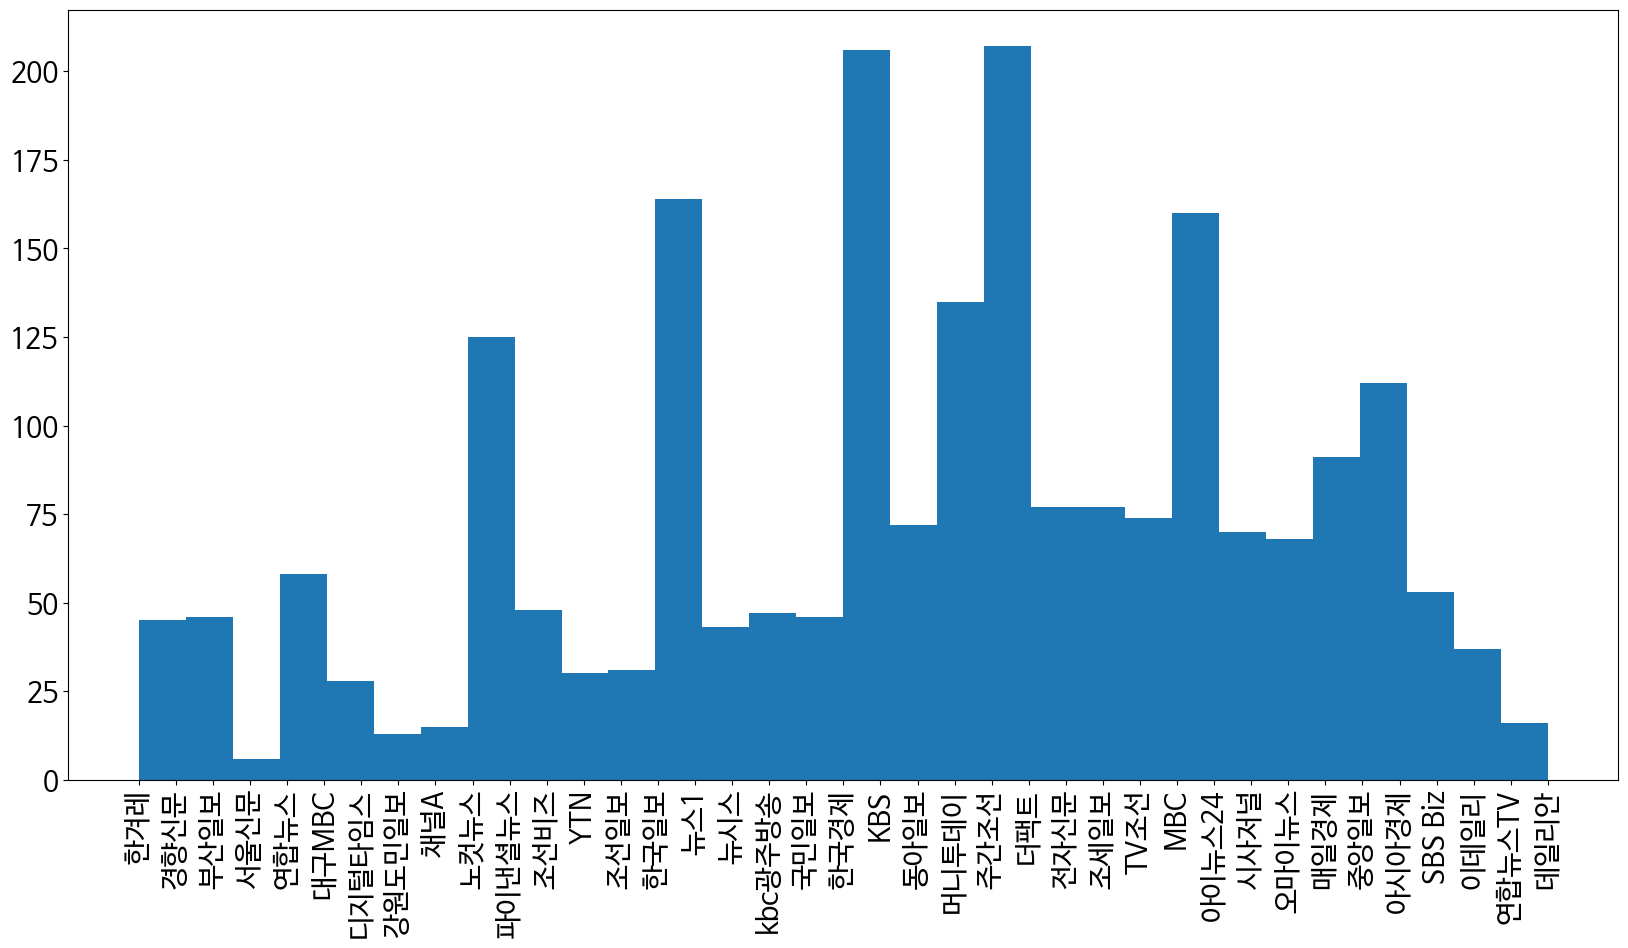

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = plt.subplot(111)
ax.hist(df['publisher'],bins=30)
ax.tick_params('x',labelsize=20,rotation = 90)
ax.tick_params('y',labelsize=20)